In [2]:
from random import random
from random import randint
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions

In [3]:
#Creating values for FeNO with 3 classes:
FeNO_0 = np.random.normal(20, 19, 200)
FeNO_1 = np.random.normal(40, 20, 200)
FeNO_2 = np.random.normal(60, 20, 200)
#Creating values for FEV1 with 3 classes:
FEV1_0 = np.random.normal(4.65, 1, 200)
FEV1_1 = np.random.normal(3.75, 1.2, 200)
FEV1_2 = np.random.normal(2.85, 1.2, 200)
#Creating values for Broncho Dilation with 3 classes:
BD_0 = np.random.normal(150,49, 200)
BD_1 = np.random.normal(201,50, 200)
BD_2 = np.random.normal(251, 50, 200)
#Creating labels variable with three classes:(2)disease (1)possible disease (0)no disease:
not_asthma = np.zeros((200,), dtype=int)
poss_asthma = np.ones((200,), dtype=int)
asthma = np.full((200,), 2, dtype=int)
#Concatenate classes into one variable:
FeNO = np.concatenate([FeNO_0, FeNO_1, FeNO_2])
FEV1 = np.concatenate([FEV1_0, FEV1_1, FEV1_2])
BD = np.concatenate([BD_0, BD_1, BD_2])
dx = np.concatenate([not_asthma, poss_asthma, asthma])
#Create DataFrame:
df = pd.DataFrame()
#Add variables to DataFrame:
df['FeNO'] = FeNO.tolist()
df['FEV1'] = FEV1.tolist()
df['BD'] = BD.tolist()
df['dx'] = dx.tolist()
#Check database:
df

,FeNO,FEV1,BD,dx
0,11.292045,5.522390,175.386481,0
1,47.073919,4.943883,132.199819,0
2,52.651044,4.330042,106.444231,0
3,12.485366,4.463056,267.120161,0
4,-5.421433,5.030433,175.875461,0
...,...,...,...,...
595,107.649485,-0.233862,263.456482,2
596,77.037849,2.856858,143.425019,2
597,54.568143,2.609621,235.812402,2
598,53.293069,1.393879,170.014448,2


/var/folders/mr/6lsbmx7n2213xttzgk6h4b5h0000gq/T/ipykernel_96539/3622805903.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['FEV1'], shade=True, color="b", ax=axs[0, 0])
/var/folders/mr/6lsbmx7n2213xttzgk6h4b5h0000gq/T/ipykernel_96539/3622805903.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['FeNO'], shade=True, color="b", ax=axs[0, 1])
/var/folders/mr/6lsbmx7n2213xttzgk6h4b5h0000gq/T/ipykernel_96539/3622805903.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['BD'], shade=True, color="b", ax=axs[0, 2])
/var/folders/mr/6lsbmx7n2213xttzgk6h4b5h0000gq/T/ipykernel_96539/3622805903.py:5: UserWarning: 

`d

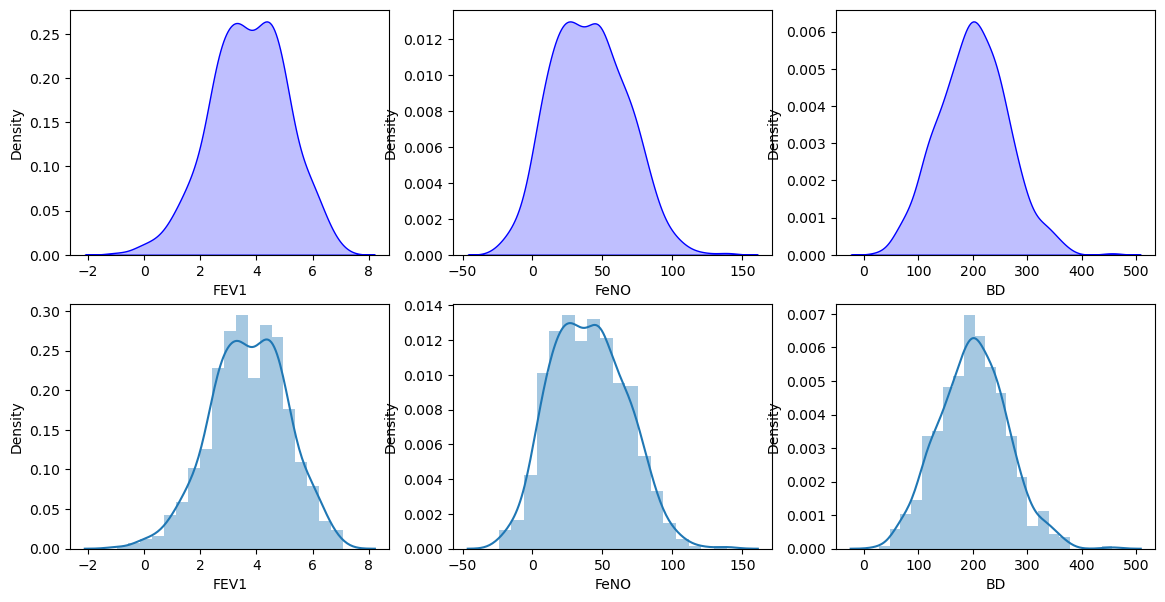

In [4]:
fig, axs = plt.subplots(2, 3, figsize=(14, 7))
sns.kdeplot(df['FEV1'], shade=True, color="b", ax=axs[0, 0])
sns.kdeplot(df['FeNO'], shade=True, color="b", ax=axs[0, 1])
sns.kdeplot(df['BD'], shade=True, color="b", ax=axs[0, 2])
sns.distplot( a=df["FEV1"], hist=True, kde=True, rug=False, ax=axs[1, 0])
sns.distplot( a=df["FeNO"], hist=True, kde=True, rug=False, ax=axs[1, 1])
sns.distplot( a=df["BD"], hist=True, kde=True, rug=False, ax=axs[1, 2])
plt.show()

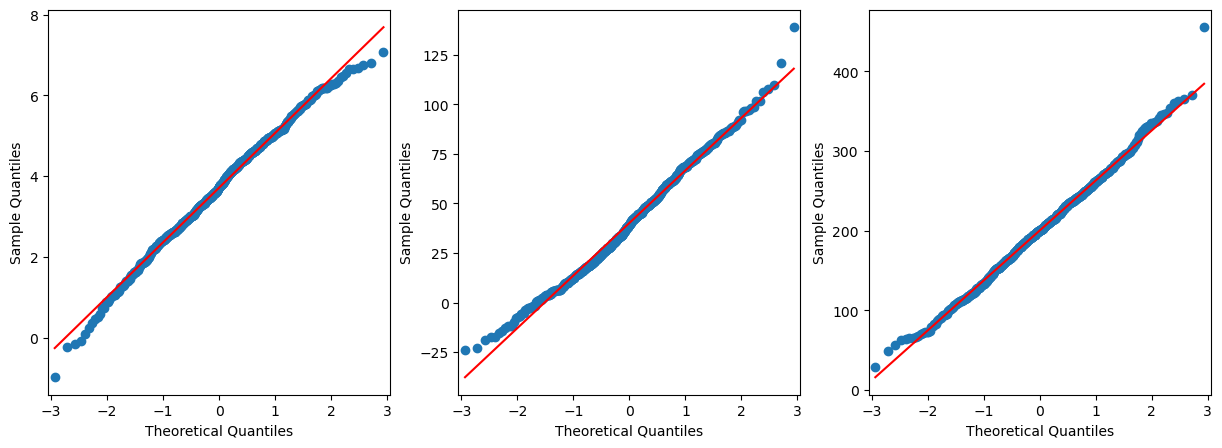

In [5]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
#q-q plot:
fig, axs = pyplot.subplots(1, 3, figsize=(15, 5))
qqplot(df['FEV1'], line='s', ax=axs[0])
qqplot(df['FeNO'], line='s', ax=axs[1])
qqplot(df['BD'], line='s', ax=axs[2])
pyplot.show()

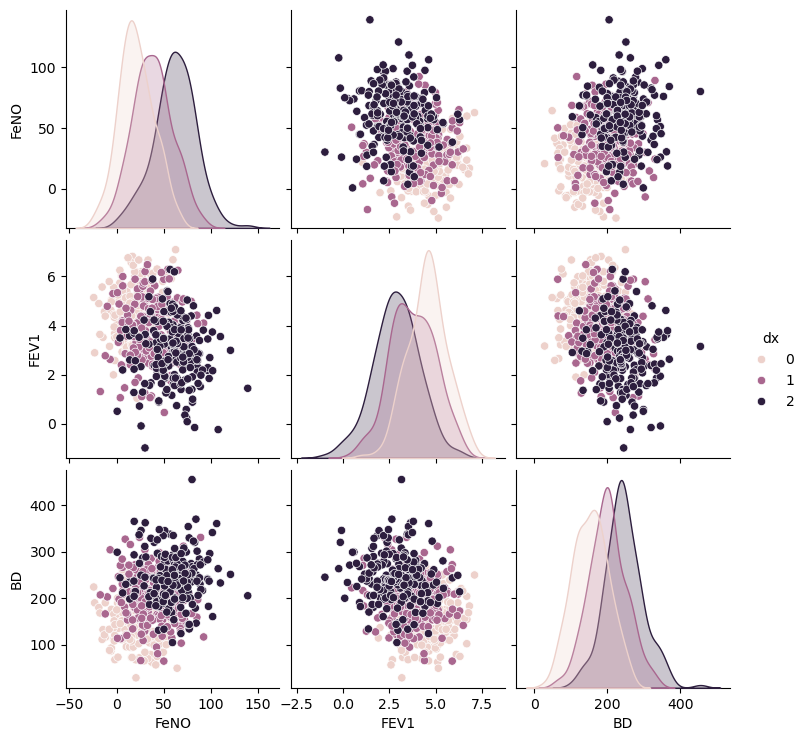

In [6]:
#Exploring dataset:
sns.pairplot(df, kind="scatter", hue="dx")
plt.show()

ValueError: The following variable cannot be assigned with wide-form data: `hue`

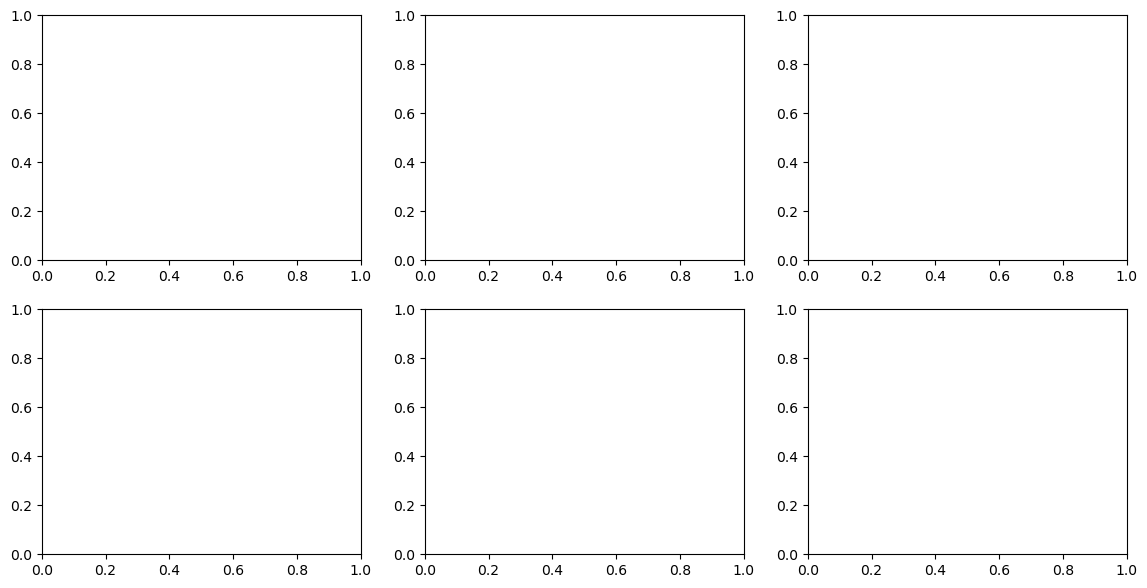

In [8]:
# plotting both distibutions on the same figure
fig, axs = plt.subplots(2, 3, figsize=(14, 7))
fig = sns.kdeplot(df['FEV1'], hue= df['dx'], fill=True, color="r", ax=axs[0, 0])
fig = sns.kdeplot(df['FeNO'], hue= df['dx'], fill=True, color="r", ax=axs[0, 1])
fig = sns.kdeplot(df['BD'], hue= df['dx'], fill=True, color="r", ax=axs[0, 2])
sns.boxplot(x=df["dx"], y=df["FEV1"], palette = 'magma', ax=axs[1, 0])
sns.boxplot(x=df["dx"], y=df["FeNO"], palette = 'magma',ax=axs[1, 1])
sns.boxplot(x=df["dx"], y=df["BD"], palette = 'magma',ax=axs[1, 2])
plt.show()